# Supervised Classification Algorithms 

## About the Dataset

> age: The person's age in years  
> sex: The person's sex (1 = male, 0 = female)  
> cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)  
> trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)  
> chol: The person's cholesterol measurement in mg/dl  
> fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)  
> restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)  
> thalach: The person's maximum heart rate achieved  
> exang: Exercise induced angina (1 = yes; 0 = no)  
> oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)  
> slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)  
> ca: The number of major vessels (0-3)  
> thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)  
> target: Heart disease (0 = no, 1 = yes)  

## Logistic Regression

### What is different between Linear and Logistic Regression?

While Linear Regression is suited for estimating continuous values (e.g. estimating house price), it is not the best tool for predicting the class of an observed data point. In order to estimate the class of a data point, we need some sort of guidance on what would be the **most probable class** for that data point. For this, we use **Logistic Regression**.

<div class="alert alert-success alertsuccess">
<font size = 3><strong>Recall linear regression:</strong></font>
<br>
<br>
As you know, __Linear regression__ finds a function that relates a continuous dependent variable, y, to some predictors (independent variables $x_1, x_2 $, etc.). For example, Simple linear regression assumes a function of the form:
<br><br>
$$
y = 𝜃_0 + 𝜃_1 * x_1 + 𝜃_2 * x_2 +...
$$
<br>
and finds the values of parameters $θ_0, θ_1, θ_2$, etc, where the term $θ_0$ is the "intercept". It can be generally shown as:
<br><br>
$$
ℎ_θ(𝑥) = 𝜃^TX
$$
<p></p>

</div>

Logistic Regression is a variation of Linear Regression, useful when the observed dependent variable, y, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Logistic regression fits a special s-shaped curve by taking the linear regression and transforming the numeric estimate into a probability with the following function, which is called sigmoid function 𝜎:

$$
ℎ_θ(𝑥) = 𝜎({θ^TX}) =  \frac {e^{(θ_0 + θ_1 * x_1 + θ_2 * x_2 +...)}}{1 + e^{(θ_0 + θ_1 * x_1 + θ_2 * x_2 +...)}}
$$
Or:
$$
ProbabilityOfaClass_1 =  P(Y=1|X) = 𝜎({θ^TX}) = \frac{e^{θ^TX}}{1+e^{θ^TX}} 
$$

In this equation, ${θ^TX}$ is the regression result (the sum of the variables weighted by the coefficients), `exp` is the exponential function and $𝜎(θ^TX)$ is the sigmoid or [logistic function](http://en.wikipedia.org/wiki/Logistic_function), also called logistic curve. It is a common "S" shape (sigmoid curve).

So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability:

<img
src="https://ibm.box.com/shared/static/kgv9alcghmjcv97op4d6onkyxevk23b1.png" width = "400" align = "center">


The objective of __Logistic Regression__ algorithm, is to find the best parameters θ, for $ℎ_θ(𝑥) = 𝜎({θ^TX})$, in such a way that the model best predicts the class of each case.

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import *  

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline 

import os
print(os.listdir("../input"))

['heart.csv']


In [2]:
df = pd.read_csv('../input/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
X = df.drop(['target', ], axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [5]:
y = df['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


**Utility Functions**

In [7]:
def plot_confusion_matrix(y, pred, labels, classes, normalize=False, cmap=plt.cm.Blues):
    """
    Plots the confusion matrix.
    Args:
        y: Data Labels
        pred: Predicted outputs
        labels: A list of label values to calculate confusion matrix
        classes: A list of containing unique class names for plotting
        normalize:Wheter to plot data with int or percentage values. Default is int.
        cmap: Color map pf the plot
    
    """
    cm = confusion_matrix(y, pred, labels=labels)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [8]:
def best_model(model, train, test, grid_params):
    """
    Takes a model and grid params as an input and finds the best model.
    
    Args:
        model: A model class
        train: A dict containing train features as X and labels as y
        test: A dict containing test features as X and labels as y
        grid_params: GridSearchCV parameters
        
    Returns:
        best_estimator, table and best_params
    """
    
    grid = GridSearchCV(model, grid_params, cv=4, scoring='f1_weighted', 
                        n_jobs=-1, return_train_score=True).fit(train['X'], train['y'])
    estimator = grid.best_estimator_
    table = pd.DataFrame(grid.cv_results_).loc[:, 
                ['params', 'mean_test_score', 'std_test_score','mean_train_score', 
                 'std_train_score']].sort_values(by='mean_test_score', ascending=False)
    
    params = grid.best_params_
    preds = estimator.predict(test['X'])
    plot_confusion_matrix(test['y'], preds, labels=[1, 0], classes=['target=1','target=0'])
    print(classification_report(test['y'], preds))
    
    return estimator, table, params
    

Lets build our model using __LogisticRegression__ from Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem in machine learning models.
**C** parameter indicates __inverse of regularization strength__ which must be a positive float. Smaller values specify stronger regularization. 
Now lets fit our model with train set:

In [9]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


              precision    recall  f1-score   support

           0       0.96      0.88      0.92        25
           1       0.92      0.97      0.95        36

   micro avg       0.93      0.93      0.93        61
   macro avg       0.94      0.93      0.93        61
weighted avg       0.94      0.93      0.93        61



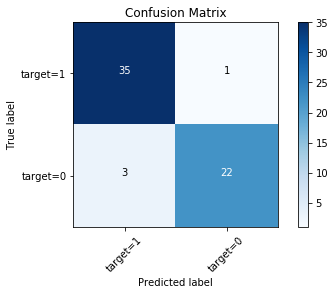

In [10]:
est, table, params = best_model(lr, train={'X': X_train, 'y': y_train},
                                test={'X': X_test, 'y':y_test},
                                grid_params=[{'solver':['liblinear', 'sag', 'newton-cg', 'lbfgs'],
                                              'C': [0.01, 0.05, 0.1, 0.5, 1, 5]}])

Based on the count of each section, we can calculate precision and recall of each label:

- __Precision__ is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

- __Recall__ is true positive rate. It is defined as: Recall =  TP / (TP + FN)
    
So, we can calculate precision and recall of each class.

__F1 score:__
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label. 

The F1score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

And finally, we can tell the average accuracy for this classifier is the average of the f1-score for both labels, which is 0.93 in our case.

The classifier correctly predicted 22 of them as 0, and 3 of them wrongly as 1. So, it hasn done a good job in predicting the target with value 0 and it did a good job predicting labels positive data. We see that 35 out of 36 was predicted correctly. A good thing about confusion matrix is that shows the model’s ability to correctly predict or separate the classes.  In specific case of binary classifier, such as this one,  we can interpret these numbers as the count of true positives, false positives, true negatives, and false negatives. 

In [11]:
est

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
params

{'C': 1, 'solver': 'newton-cg'}

In [13]:
table

,params,mean_test_score,std_test_score,mean_train_score,std_train_score
18,"{'C': 1, 'solver': 'newton-cg'}",0.828732,0.051728,0.850366,0.023343
22,"{'C': 5, 'solver': 'newton-cg'}",0.820766,0.057422,0.846290,0.023489
12,"{'C': 0.5, 'solver': 'liblinear'}",0.819685,0.052623,0.839038,0.021616
15,"{'C': 0.5, 'solver': 'lbfgs'}",0.819685,0.052623,0.839038,0.021616
10,"{'C': 0.1, 'solver': 'newton-cg'}",0.819597,0.053790,0.834832,0.028491
14,"{'C': 0.5, 'solver': 'newton-cg'}",0.815810,0.057878,0.844743,0.024969
16,"{'C': 1, 'solver': 'liblinear'}",0.815725,0.052729,0.843328,0.023780
19,"{'C': 1, 'solver': 'lbfgs'}",0.815541,0.041879,0.844678,0.026162
4,"{'C': 0.05, 'solver': 'liblinear'}",0.814273,0.034255,0.831545,0.019418
7,"{'C': 0.05, 'solver': 'lbfgs'}",0.814273,0.034255,0.831545,0.019418


__predict_proba__  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [14]:
est.predict_proba(X_test)[0:5]

array([[0.25667477, 0.74332523],
       [0.94444106, 0.05555894],
       [0.46871255, 0.53128745],
       [0.01567819, 0.98432181],
       [0.19493033, 0.80506967]])

## Evaluation

### Jaccard Index

Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [15]:
jaccard_similarity_score(y_test, est.predict(X_test))

0.9344262295081968

### Log Loss

Now, lets try __log loss__ for evaluation. In logistic regression, the output can be a probability (or equals to 1). This probability is a value between 0 and 1.
Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1. 

In [16]:
log_loss(y_test, est.predict_proba(X_test))

0.3005806554847799

## SVM(Support Vector Machines) 

 SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data are transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

    1.Linear
    2.Polynomial
    3.Radial basis function (RBF)
    4.Sigmoid
    
Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results.

In [17]:
from sklearn.svm import SVC

sv = SVC(gamma='scale')

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


              precision    recall  f1-score   support

           0       0.82      0.92      0.87        25
           1       0.94      0.86      0.90        36

   micro avg       0.89      0.89      0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



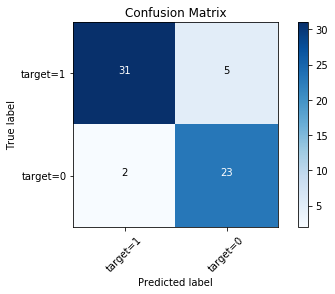

In [18]:
est, table, params = best_model(sv, train={'X': X_train, 'y': y_train},
                                test={'X': X_test, 'y':y_test},
                                grid_params=[{'kernel':['linear', 'rbf'],
                                              'C': [1, 3, 5, 7, 10, 20]}])

In [19]:
est

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
table

,params,mean_test_score,std_test_score,mean_train_score,std_train_score
8,"{'C': 10, 'kernel': 'linear'}",0.845403,0.057003,0.861415,0.017670
2,"{'C': 3, 'kernel': 'linear'}",0.845260,0.056810,0.862774,0.027361
4,"{'C': 5, 'kernel': 'linear'}",0.845260,0.056810,0.866942,0.025619
6,"{'C': 7, 'kernel': 'linear'}",0.841351,0.063188,0.862922,0.021590
10,"{'C': 20, 'kernel': 'linear'}",0.833224,0.063778,0.858861,0.025238
0,"{'C': 1, 'kernel': 'linear'}",0.828095,0.059618,0.854204,0.022113
11,"{'C': 20, 'kernel': 'rbf'}",0.678745,0.047667,0.710396,0.016487
9,"{'C': 10, 'kernel': 'rbf'}",0.678291,0.043652,0.705889,0.015057
5,"{'C': 5, 'kernel': 'rbf'}",0.677557,0.053260,0.691658,0.019240
3,"{'C': 3, 'kernel': 'rbf'}",0.668772,0.026138,0.682047,0.020051


In [21]:
params

{'C': 10, 'kernel': 'linear'}

In [22]:
jaccard_similarity_score(y_test, est.predict(X_test))

0.8852459016393442

## K-Nearest Neighbors


**K-Nearest Neighbors** is an algorithm for supervised learning. Where the data is 'trained' with data points corresponding to their classification. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification.

### Here's an visualization of the K-Nearest Neighbors algorithm.

<img src = "https://ibm.box.com/shared/static/mgkn92xck0z05v7yjq8pqziukxvc2461.png" width=500 height=500>

In this case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a k value of 3 (3 nearest data points) we will obtain a prediction of Class B. Yet if we consider a k value of 6, we will obtain a prediction of Class A.

In this sense, it is important to consider the value of k. But hopefully from this diagram, you should get a sense of what the K-Nearest Neighbors algorithm is. It considers the 'K' Nearest Neighbors (points) when it predicts the classification of the test point.

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


              precision    recall  f1-score   support

           0       0.63      0.68      0.65        25
           1       0.76      0.72      0.74        36

   micro avg       0.70      0.70      0.70        61
   macro avg       0.70      0.70      0.70        61
weighted avg       0.71      0.70      0.71        61



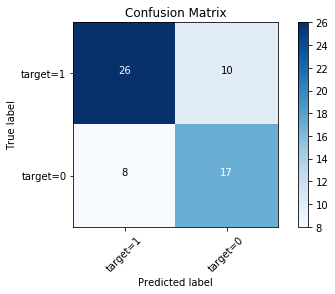

In [24]:
est, table, params = best_model(knn, train={'X': X_train, 'y': y_train},
                                test={'X': X_test, 'y':y_test},
                                grid_params=[{'n_neighbors':list(range(5,30)),
                                              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                                              'leaf_size': [10, 20, 30, 40, 50]}])

In [25]:
est

KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=17, p=2,
           weights='uniform')

In [26]:
table.head()

,params,mean_test_score,std_test_score,mean_train_score,std_train_score
187,"{'algorithm': 'kd_tree', 'leaf_size': 30, 'n_n...",0.666471,0.033538,0.67694,0.004392
12,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n...",0.666471,0.033538,0.67694,0.004392
37,"{'algorithm': 'ball_tree', 'leaf_size': 20, 'n...",0.666471,0.033538,0.67694,0.004392
62,"{'algorithm': 'ball_tree', 'leaf_size': 30, 'n...",0.666471,0.033538,0.67694,0.004392
312,"{'algorithm': 'brute', 'leaf_size': 30, 'n_nei...",0.666471,0.033538,0.67694,0.004392


In [27]:
params

{'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 17}

## Decision Trees

In [28]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


              precision    recall  f1-score   support

           0       0.73      0.76      0.75        25
           1       0.83      0.81      0.82        36

   micro avg       0.79      0.79      0.79        61
   macro avg       0.78      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



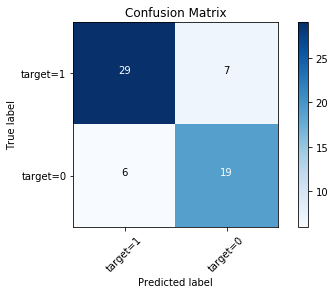

In [29]:
est, table, params = best_model(dt, train={'X': X_train, 'y': y_train},
                                test={'X': X_test, 'y':y_test},
                                grid_params=[{'max_depth':list(range(4,15)),
                                              'criterion': ['gini', 'entropy']}])

In [30]:
est

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
table

,params,mean_test_score,std_test_score,mean_train_score,std_train_score
8,"{'criterion': 'gini', 'max_depth': 12}",0.775282,0.058970,1.000000,0.000000
6,"{'criterion': 'gini', 'max_depth': 10}",0.763951,0.070074,0.998627,0.002378
7,"{'criterion': 'gini', 'max_depth': 11}",0.758713,0.065856,1.000000,0.000000
15,"{'criterion': 'entropy', 'max_depth': 8}",0.756071,0.027156,0.987612,0.013708
16,"{'criterion': 'entropy', 'max_depth': 9}",0.756000,0.016208,0.991731,0.014322
10,"{'criterion': 'gini', 'max_depth': 14}",0.755373,0.066201,1.000000,0.000000
21,"{'criterion': 'entropy', 'max_depth': 14}",0.751396,0.017287,1.000000,0.000000
4,"{'criterion': 'gini', 'max_depth': 8}",0.746733,0.078339,0.987649,0.015705
9,"{'criterion': 'gini', 'max_depth': 13}",0.742414,0.065008,1.000000,0.000000
5,"{'criterion': 'gini', 'max_depth': 9}",0.742388,0.060051,0.997250,0.004762


In [32]:
params

{'criterion': 'gini', 'max_depth': 12}

**See the Generated Tree Structure**

In [33]:
import matplotlib.image as mpimg
from sklearn import tree

filename = "tree.png"
feature_names = X.columns.tolist()
target_names = ['0', '1']
tree.export_graphviz(est, feature_names=feature_names, out_file='tree.dot', 
                           class_names=target_names, filled=True, 
                           special_characters=True) 

In [34]:
print(os.listdir('../working/'))

['__notebook__.ipynb', '__output__.json', 'tree.dot']


In [35]:
! dot -Tpng tree.dot -o tree.png

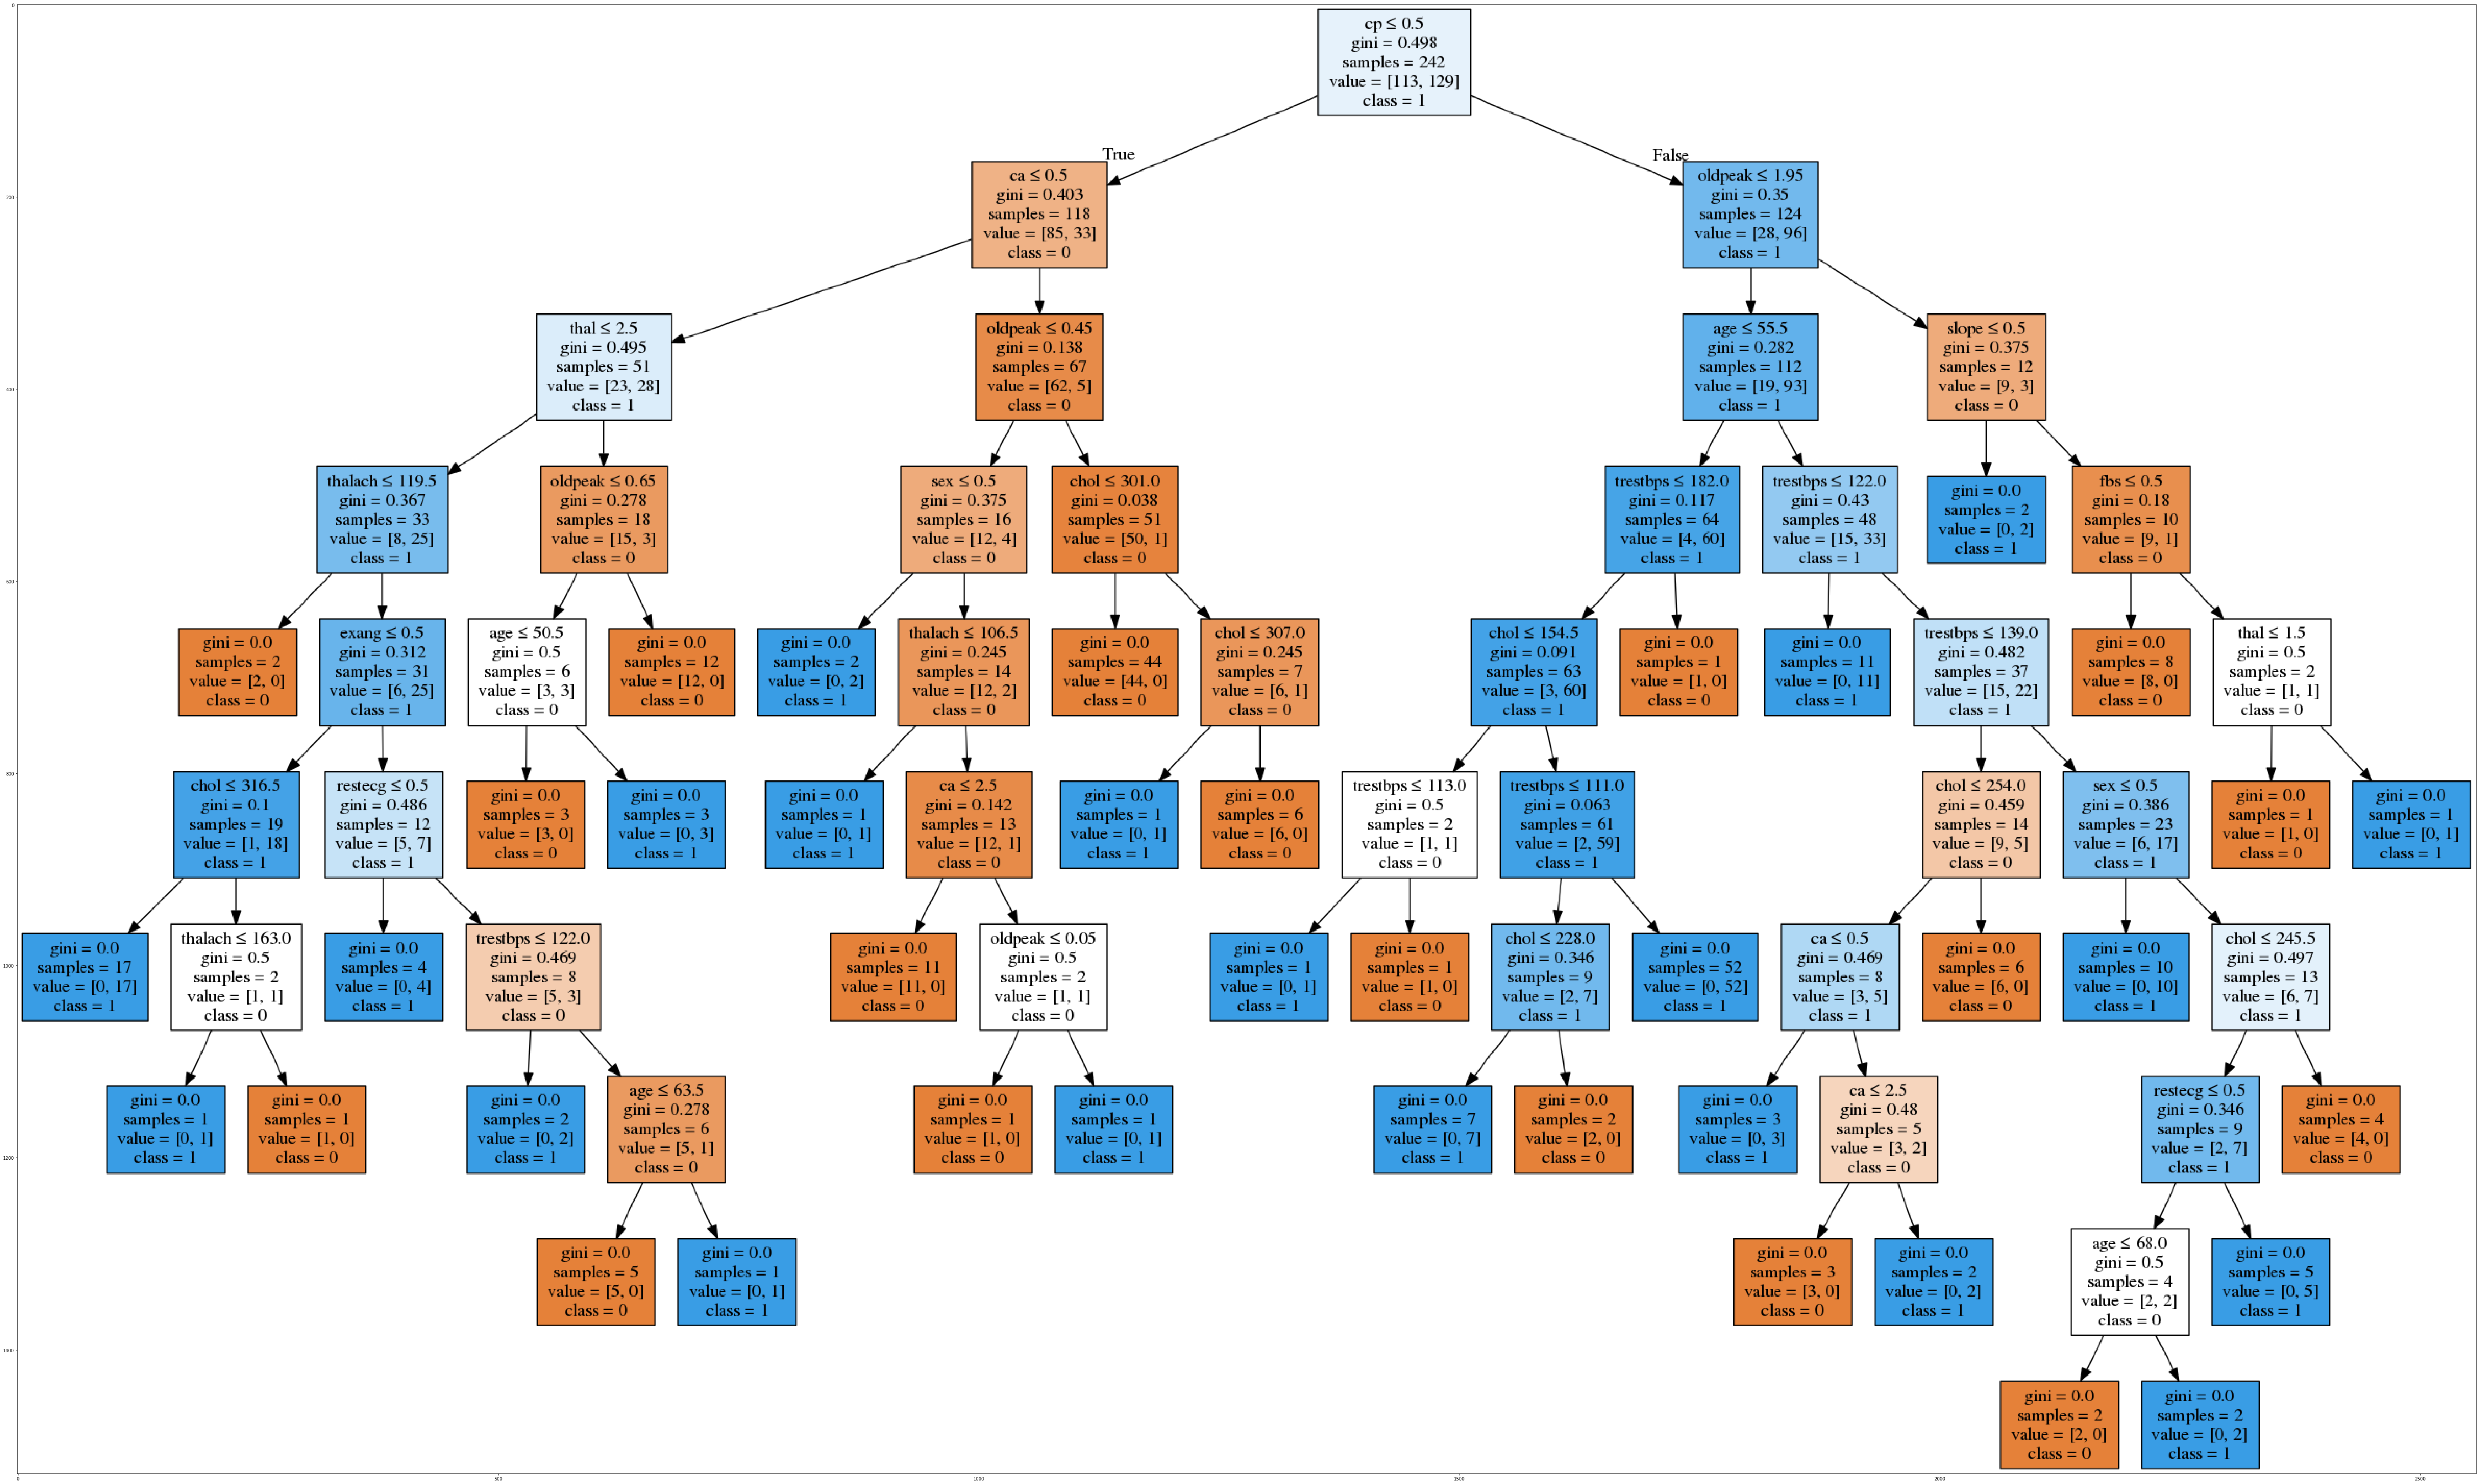

In [36]:
img = mpimg.imread('../working/tree.png')
plt.figure(figsize=(100, 200))
plt.imshow(img, interpolation='nearest')

The picture is not so clear now but when working locally, we have the option to zoom in for real structure of the data

## Naive Bayes

Naive Bayes classifiers are built on Bayesian classification methods.
These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.
In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as $P(L~|~{\rm features})$.
Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

If we are trying to decide between two labels—let's call them $L_1$ and $L_2$—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$

All we need now is some model by which we can compute $P({\rm features}~|~L_i)$ for each label.
Such a model is called a *generative model* because it specifies the hypothetical random process that generates the data.
Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier.
The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

This is where the "naive" in "naive Bayes" comes in: if we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification.
Different types of naive Bayes classifiers rest on different naive assumptions about the data, and we will examine gaussian version with this data.

In [37]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


              precision    recall  f1-score   support

           0       0.83      0.76      0.79        25
           1       0.84      0.89      0.86        36

   micro avg       0.84      0.84      0.84        61
   macro avg       0.83      0.82      0.83        61
weighted avg       0.84      0.84      0.83        61



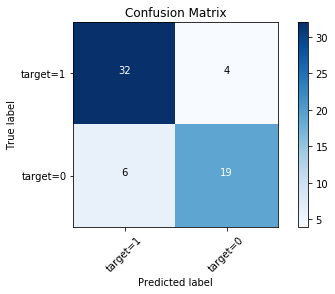

In [38]:
est, table, params = best_model(nb, train={'X': X_train, 'y': y_train},
                                test={'X': X_test, 'y':y_test},
                                grid_params=[{'var_smoothing':[1e-2, 1e-3, 1e-4, 1e-5,
                                                               1e-6, 1e-7, 1e-8, 1e-9]}])

In [39]:
est

GaussianNB(priors=None, var_smoothing=1e-06)

In [40]:
table

,params,mean_test_score,std_test_score,mean_train_score,std_train_score
4,{'var_smoothing': 1e-06},0.821441,0.058497,0.844028,0.016951
5,{'var_smoothing': 1e-07},0.821441,0.058497,0.844087,0.020500
6,{'var_smoothing': 1e-08},0.821441,0.058497,0.845487,0.022121
7,{'var_smoothing': 1e-09},0.821441,0.058497,0.845487,0.022121
3,{'var_smoothing': 1e-05},0.821156,0.073041,0.841064,0.020830
2,{'var_smoothing': 0.0001},0.815676,0.071397,0.822139,0.016597
1,{'var_smoothing': 0.001},0.734559,0.042543,0.731008,0.006901
0,{'var_smoothing': 0.01},0.678287,0.048285,0.690495,0.008221


In [41]:
params

{'var_smoothing': 1e-06}

## Conclusions

Our best method would be Logistic Regression for this problem with %93 accuracy. 
I hope you liked my kernel - don't forget to upvote if you do :).